In [1]:
import numpy  as np

Model with variable layers variabel units and same sigmoid activation 

different activation update comming !

In [2]:
class Model:
    def __init__(self,inp_features,layers=3,units=[10,5,1],activations=['sig','sig','sig']):
        self.W = [np.random.randn(units[0],inp_features)]
        self.b = [np.zeros((1,units[0]))]
        for each in units[1:]:
            self.W.append(np.random.randn(each,self.W[units.index(each)-1].shape[0]))
            self.b.append(np.zeros((1,each)))
        #self.activations = activations
        self.layers = layers;
        self.activations = activations
    
    def fit(self,X,y,iters=100,lr=0.01):
        self.X = X
        self.y = y
        self.lr = lr
        
        loss = []
        for each in range(iters):
            loss.append(self.loss())
            self.update_grads()
            
        
        return loss
    
    def update_grads(self):
        grads = self.grads()
        for w,grad in zip(self.W,grads[:len(self.W)]):
            w -= grad * self.lr
            
        for w,grad in zip(self.b,grads[len(self.W):]):
            w -= grad * self.lr
            
    def partial_of_activation(self,A,n):
        if(self.activations[n] == 'sig'):
            return A*(1-A)
        elif(self.activations[n] == 'tanh'):
            return 1 - (A**2)
        else:
            A[A>0] = 1
            return A
            
    def grads(self):
        params = self.forward_pass(self.X)
        common = 1
        g_w = []
        g_b = []
        for n in range(self.layers-1,-1,-1):
            if(n==self.layers-1):
                common = common * (params[n] - self.y)
                dw = np.mean(common * params[n-1] , axis=0).reshape(self.W[n].shape)
                g_w.append(dw)
                g_b.append(np.mean(common,axis=0,keepdims=True))
                continue
            
            common = np.dot(common,self.W[n+1]) * self.partial_of_activation(params[n],n)
            if(n==0):
                dw = np.dot(common.T,self.X)
            else:
                dw = np.dot(common.T,params[n-1])
            
            db = np.mean(common,axis=0,keepdims=True)
            
            g_w.append(dw)
            g_b.append(db)
        
        g_w.reverse()
        g_b.reverse()
        return g_w+g_b
    
    def forward_pass(self,X):
        outs = []
        A = 0
        for layer in range(self.layers):
            if not layer:
                A = self.sig(np.dot(X,self.W[layer].T) + self.b[layer])
            else:
                A = self.sig(np.dot(A,self.W[layer].T) + self.b[layer])
            outs.append(A)
            
        return outs
    
    def sig(self,Z):
        return 1 / (1 + np.exp(-Z))
    
    def loss(self):
        yh = self.forward_pass(self.X)[-1]
        ll = -(self.y*np.log(yh) + (1-self.y)*np.log(1-yh))
        return np.mean(ll)
    
    def predict_point(self,X):
        return (self.forward_pass(X)[-1] > 0.5).astype('int')
    
    def score(self,X,y):
        yh = self.predict_point(X)
        return np.mean(yh==y)
    

In [3]:
from sklearn.datasets import make_moons,make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
X,y = make_moons(1000,noise=0.3)

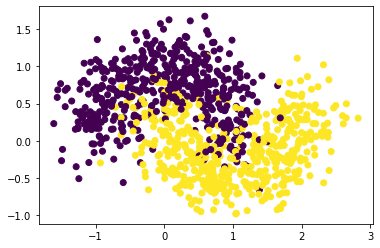

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

y_train = y_train[...,np.newaxis]
y_test = y_test[...,np.newaxis]

In [7]:
model = Model(2) # By default ReLU activation

In [8]:
hist = model.fit(X_train,y_train,iters=5000)

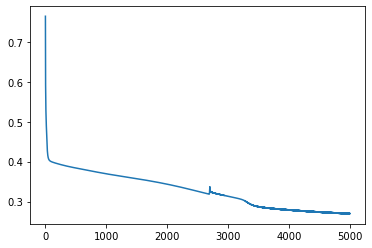

In [9]:
plt.plot(hist)

In [10]:
model.score(X_test,y_test)

0.9393939393939394

In [11]:
def make_grid(X,model):
    xmn, xmx = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymn, ymx = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx,yy = np.meshgrid(np.arange(xmn,xmx,0.1),np.arange(ymn,ymx,0.1))
    XX_grid = np.c_[xx.ravel(),yy.ravel()]
    grid_preds = model.predict_point(XX_grid)
    grid_preds = grid_preds.reshape(xx.shape)
    return xx,yy,grid_preds

In [12]:
xx,yy,grid_preds = make_grid(X,model)

In [13]:
preds = model.predict_point(X_test)

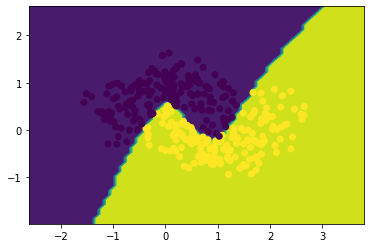

In [14]:
plt.contourf(xx,yy,grid_preds)
plt.scatter(X_test[:,0],X_test[:,1],c=preds)

In [15]:
for each in range(len(preds)):
    if not preds[each]:
        preds[each] = 1
    else:
        preds[each] = 0

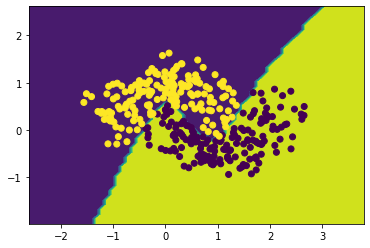

In [16]:
plt.contourf(xx,yy,grid_preds)
plt.scatter(X_test[:,0],X_test[:,1],c=preds)
# Reversed for better showcase        